#Why are millions of people in Texas still without power after a "massive failure"?

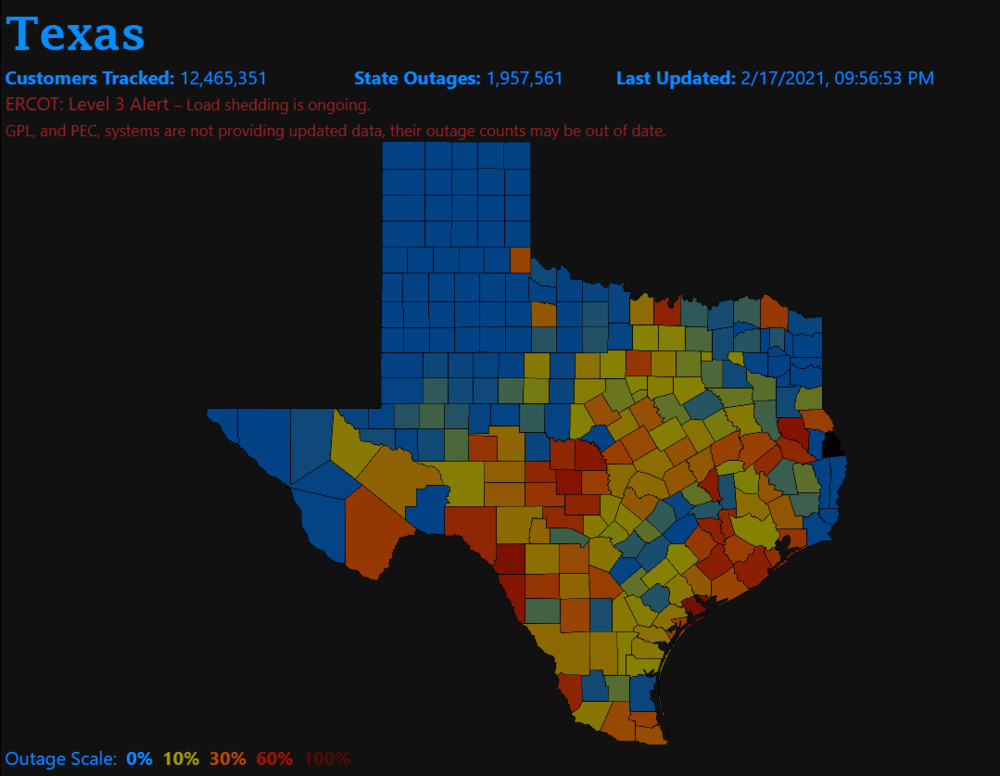

# Introduction 
An introduction (10 sentences and at least five citations) on the relationship between weather and electric demand, and how statistical/ML/DL models are being used in this space.




During a literature review, a strong correlation between weather and electric demand was discovered. Other factors, such as the day of the week, holidays, and sunset/sunrise times, can all have an impact on power consumption. Various studies using various methods such as LSTM, ARIMA, SVR, PSO, and so on are used to forecast power demand. So, in our model, we will first do variables engineering to obtain our variables, and then combine what people have previously done with our RNN model to predict electric demand.

* This white paper discusses how (ERCOT), the Texas state's principal grid operator, reported that due to excessive cold, more than 4 million Texans were without power for several days.The necessity of traditional energy sources was highlighted by a major Texas winter storm that exposed flaws in the state's electric grid stability.
https://www.landman.org/downloads/AAPL_Texas_Power_Outage_White_Paper_Feb_25_2021.pdf

The residential and commercial demand is very temperature sensitive,power companies use hourly and daily temperature forecasts to estimate peak load demand, (5-10% fluctuation in total power demand)

* The Role of Temperature Variability on Seasonal Electricity Demand in the Southern US
Link:https://www.frontiersin.org/articles/10.3389/frsc.2021.644789/full#:~:text=Residential%20and%20commercial%20demands%20are,grid%20(Changnon%2C%202003).

From the case studies of the island of Bali and the Central Java province ,it can be observed that the weather variables that affect the load response are different in each region.This can be influenced by the customer,topography,and demography so that the load characteristics in one area will be different from another. However, there are some common variables that have strong correlation with electric demand, those are temperature,solar radiation, and windspeed. Pressure and relative humidity donot have a strong enough correlation to changes in electric load.
* Siti Aisyah and Arionmaro Asi Simaremare 2021 IOP Conf. Ser.: Earth Environ. Sci. 927 012015.
Link:https://iopscience.iop.org/article/10.1088/1755-1315/927/1/01201

Based on the data of power consumption for a last 47 months of the City of Dhaka in Bangladesh, it can be concluded that electricity consumption changes in response to change in the mean daily air temperature. The peak electricity consumption is significantly increased during summer season as compared to winter season due to the uses of cooling appliances. This study proved that reduction of 1˚C air temperature reduces about 81 MW electricity demand of Dhaka city. 
* A. Istiaque and S. I. Khan, "Impact of Ambient Temperature on Electricity Demand of Dhaka City of Bangladesh," Energy Power Eng., vol. 10, no. 07, pp. 319–331, 2018, doi: 10.4236/epe.2018.107020.
Link: https://www.scirp.org/journal/paperinformation.aspx?paperid=85860#:~:text=This%20study%20proved%20that%20reduction,due%20to%20increase%20in%20temperature.

Another study uses semi-parametric additive model, which is in the regression framework but with some nonlinear relationshipsand with serially correlated errors to predict the half-hourly demand. In this model, some special features such as the temperatures from the last 2.5h, the temperatures from the same time period for the last two days, the current temperature differential and the temperature differential from the last 6h, the temperature differential from the same time period ofthe previous day, the maximum & minimum temperature in the last 24h, the average temperature in the last seven days, so on and so forth are taken into considerations.
* Hyndman, R.J. and Fan, S. (2010) Density Forecasting for Long-Term Peak Electricity Demand. IEEE Transactions on Power Systems, 25, 1142-1153.
Link: https://ieeexplore.ieee.org/document/5345698

This study proposed a forecasting model of the residential sector's electricity demand. A comprehensive list of weather and social variables were considered as candidates. And the one-month-ahead forecast was based on SVR and fuzzy-rough with PSO algorithms. 
* Son, & Kim, C. (2017). Short-term forecasting of electricity demand for the residential sector using weather and social variables. Resources, Conservation and Recycling, 123, 200–207. 
Link: https://www-sciencedirect-com.ezproxy.lib.uconn.edu/science/article/pii/S0921344916300167

According to this study, deep learning frameworks have gained a particular attention in predicting electric demand. Compared to shallow learning, deep learning usually involves a larger number of hidden layers, which makes the model able to learn more complex non-linear patterns. As a deep learning framework with powerful learning ability to capture the non-stationary and long-term dependencies forecasting horizon, recurrent neural networks (RNNs) are effective methods for load forecasting in power grids. Compared with the state-of-the-art techniques in household load forecasting, the proposed method outperforms ARIMA by 19.5%, SVR by 13.1% and RNN by 6.5% in terms of RMSE.
* Tian, Ma, J., Zhang, C., & Zhan, P. (2018). A Deep Neural Network Model for Short-Term Load Forecast Based on Long Short-Term Memory Network and Convolutional Neural Network. Energies (Basel), 11(12), 3493–.
Link: https://www.mdpi.com/1996-1073/11/12/3493/htm

This paper explores the potential of employing the state-of-art deep learning technique for household STLF under high uncertainty and volatility. A novel PDRNN is proposed to address the overfitting challenges brought by the naive deep network. The result of this model indicates significant improvement for household load forecasting. Compared with state-of-the-art, the proposed method outperforms ARIMA by 19.5%, SVR by 13.1% and classical deepRNN by 6.5% in terms of RMSE and similar performance under other metrics
* Shi, H.; Xu, M.; Li, R. Deep Learning for Household Load Forecasting—A Novel Pooling Deep RNN. IEEE Trans. Smart Grid 2018, 9, 5271–5280.
Link: https://ieeexplore-ieee-org.ezproxy.lib.uconn.edu/stamp/stamp.jsp?tp=&arnumber=7885096



https://www.landman.org/downloads/AAPL_Texas_Power_Outage_White_Paper_Feb_25_2021.pdf

# Data resampling and cleaning
What did you do to clean the data and how did affect the distributions of the variables?


## Import useful function


In [ ]:
import pandas as pd

## Download data

In [ ]:
# https://drive.google.com/file/d/1fey_y_jqjxx7-Rbm6wTeERwnPZ9ZcdUv/view?usp=sharing  # THIS IS OUR DATA!
!gdown --id 1fey_y_jqjxx7-Rbm6wTeERwnPZ9ZcdUv # THIS IS OUR DATA!

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fey_y_jqjxx7-Rbm6wTeERwnPZ9ZcdUv
To: /content/Ercot_2011_2021_feb.csv
100% 3.52M/3.52M [00:00<00:00, 144MB/s]


In [ ]:
energy = pd.read_csv('Ercot_2011_2021_feb.csv') # read the data from our shared drive
energy['Date'] = pd.to_datetime(energy['Date']) # set the Date column as Datetime 
energy.head(24)   # To see the combination of Date and HE

,Unnamed: 0,Date,HE,MWh
0,0,2010-01-01,1,32094.064435
1,1,2010-01-01,2,32171.322546
2,2,2010-01-01,3,32241.752463
3,3,2010-01-01,4,32459.193227
4,4,2010-01-01,5,33123.751047
5,5,2010-01-01,6,34314.953512
6,6,2010-01-01,7,35498.596749
7,7,2010-01-01,8,36028.145673
8,8,2010-01-01,9,36092.666893
9,9,2010-01-01,10,35765.174232


In [ ]:
# https://drive.google.com/file/d/1vhDIf22zE6G98Ec9diLsL5qSSXqtDfOA/view?usp=sharing   #THIS IS OUR DATA!
!gdown --id 1vhDIf22zE6G98Ec9diLsL5qSSXqtDfOA  # THIS IS OUR DATA!

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1vhDIf22zE6G98Ec9diLsL5qSSXqtDfOA
To: /content/FST.csv
100% 97.2M/97.2M [00:00<00:00, 201MB/s]


In [ ]:
weather = pd.read_csv('FST.csv')    # read the data from our shared drive
weather.head(1)  # To see the first few of data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar
0,FST,2010-01-01 00:53,30.02,24.98,81.27,180.00,5.00,M,30.50,1031.80,...,M,M,M,M,M,M,M,M,24.04,METAR KFST 010553Z AUTO 18005KT 10SM CLR M01/M...


##Data Cleaning
The energy data is already at hourly resolution. The weather data should be resampled to hourly resolution using pandas, and return the maximum weather value per hour. You must set the date/time column as the index before resampling or the code will break. If there is missing data after resampling, you can do linear interpolation, ffill or bfill between data points so there are no missing values at the end. 

I’ve already started a basic notebook for you to get started (PrepERCOTdata.ipynb): https://colab.research.google.com/drive/1Sysc7LPXAC0GlyulvJMvcqa4Mnl0Ed_F?usp=sharing 


In [ ]:
weather['valid'] = pd.to_datetime(weather['valid'])  # change it to datetime 
weather.dtypes  # see if it works 

station                      object
valid                datetime64[ns]
tmpf                         object
dwpf                         object
relh                         object
drct                         object
sknt                         object
p01i                         object
alti                         object
mslp                         object
vsby                         object
gust                         object
skyc1                        object
skyc2                        object
skyc3                        object
skyc4                        object
skyl1                        object
skyl2                        object
skyl3                        object
skyl4                        object
wxcodes                      object
ice_accretion_1hr            object
ice_accretion_3hr            object
ice_accretion_6hr            object
peak_wind_gust               object
peak_wind_drct               object
peak_wind_time               object
feel                        

In [ ]:
print(weather['valid'].min()) # see the range of 'valid'
print(weather['valid'].max())

2010-01-01 00:53:00
2021-02-19 23:55:00


In [ ]:
weather.set_index(weather['valid'], inplace=True)   # set it index, so that we could interpolation.
weather.head(1)  # see the first 1 rows

,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar
valid,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:53:00,FST,2010-01-01 00:53:00,30.02,24.98,81.27,180.00,5.00,M,30.50,1031.80,...,M,M,M,M,M,M,M,M,24.04,METAR KFST 010553Z AUTO 18005KT 10SM CLR M01/M...


In [ ]:
weather1=weather # DO NOT OVERWRITE IT NOW!

In [ ]:
weather1['tmpf'] = pd.to_numeric(weather1['tmpf'],errors='coerce')   # change the datatype to numeric
weather1['dwpf'] = pd.to_numeric(weather1['dwpf'],errors='coerce')
weather1['relh'] = pd.to_numeric(weather1['relh'],errors='coerce')
weather1['drct'] = pd.to_numeric(weather1['drct'],errors='coerce')
weather1['sknt'] = pd.to_numeric(weather1['sknt'],errors='coerce')
weather1['alti'] = pd.to_numeric(weather1['alti'],errors='coerce')
weather1['mslp'] = pd.to_numeric(weather1['mslp'],errors='coerce')
weather1['vsby'] = pd.to_numeric(weather1['vsby'],errors='coerce')
weather1['feel'] = pd.to_numeric(weather1['feel'],errors='coerce')

In [ ]:
weather1.dtypes # see if they are in correct data type

station                      object
valid                datetime64[ns]
tmpf                        float64
dwpf                        float64
relh                        float64
drct                        float64
sknt                        float64
p01i                         object
alti                        float64
mslp                        float64
vsby                        float64
gust                         object
skyc1                        object
skyc2                        object
skyc3                        object
skyc4                        object
skyl1                        object
skyl2                        object
skyl3                        object
skyl4                        object
wxcodes                      object
ice_accretion_1hr            object
ice_accretion_3hr            object
ice_accretion_6hr            object
peak_wind_gust               object
peak_wind_drct               object
peak_wind_time               object
feel                        

In [ ]:
weather2=weather1[['valid','tmpf','dwpf','relh','drct','sknt','alti','mslp','vsby','feel']]
weather2 # see if it works 

,valid,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,feel
valid,,,,,,,,,,
2010-01-01 00:53:00,2010-01-01 00:53:00,30.02,24.98,81.27,180.0,5.0,30.50,1031.8,10.0,24.04
2010-01-01 01:53:00,2010-01-01 01:53:00,28.04,24.08,84.87,190.0,5.0,30.49,1031.3,10.0,21.69
2010-01-01 02:53:00,2010-01-01 02:53:00,26.96,23.00,84.80,220.0,9.0,30.47,1030.9,10.0,17.25
2010-01-01 03:53:00,2010-01-01 03:53:00,26.96,23.00,84.80,210.0,8.0,30.46,1030.4,10.0,17.90
2010-01-01 04:53:00,2010-01-01 04:53:00,28.04,23.00,81.11,220.0,12.0,30.44,1030.0,10.0,16.96
...,...,...,...,...,...,...,...,...,...,...
2021-02-19 23:40:00,2021-02-19 23:40:00,NaN,NaN,NaN,220.0,11.0,30.21,NaN,10.0,NaN
2021-02-19 23:45:00,2021-02-19 23:45:00,NaN,NaN,NaN,230.0,11.0,30.21,NaN,10.0,NaN
2021-02-19 23:50:00,2021-02-19 23:50:00,NaN,NaN,NaN,230.0,11.0,30.21,NaN,10.0,NaN


In [ ]:
# WE ARE USING ffill, this is like the nature of time series.
# MUST set as 60 T .
weather2=weather2.resample('60T').max()#    Overwrite it 

In [ ]:
weather2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97632 entries, 2010-01-01 00:00:00 to 2021-02-19 23:00:00
Freq: 60T
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   valid   96325 non-null  datetime64[ns]
 1   tmpf    95936 non-null  float64       
 2   dwpf    95928 non-null  float64       
 3   relh    95263 non-null  float64       
 4   drct    94324 non-null  float64       
 5   sknt    95686 non-null  float64       
 6   alti    96273 non-null  float64       
 7   mslp    95697 non-null  float64       
 8   vsby    96058 non-null  float64       
 9   feel    87885 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 8.2 MB


In [ ]:
weather3=weather2.interpolate(method ='ffill') #According to the instruction, we can use ffill, bfill...

In [ ]:
energy=energy.interpolate(method ='ffill') # there is one missing value in energy

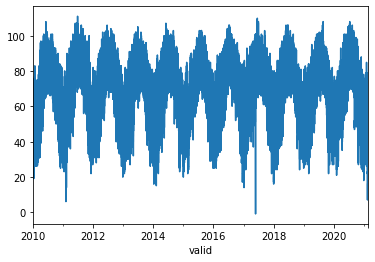

In [ ]:
weather3['tmpf'].plot()   # generate the time seriers plot

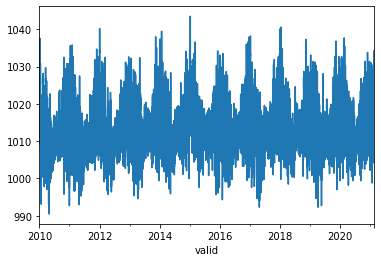

In [ ]:
weather3['mslp'].plot()

In [ ]:
energy.info()    #show the info of energy dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97848 entries, 0 to 97847
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  97848 non-null  int64         
 1   Date        97848 non-null  datetime64[ns]
 2   HE          97848 non-null  int64         
 3   MWh         97848 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.0 MB


## Primary key and Join two data together

In [ ]:
weather3.head(5)# check if it works 

,valid,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,feel
valid,,,,,,,,,,
2010-01-01 00:00:00,2010-01-01 00:53:00,30.02,24.98,81.27,180.0,5.0,30.50,1031.8,10.0,24.04
2010-01-01 01:00:00,2010-01-01 01:53:00,28.04,24.08,84.87,190.0,5.0,30.49,1031.3,10.0,21.69
2010-01-01 02:00:00,2010-01-01 02:53:00,26.96,23.00,84.80,220.0,9.0,30.47,1030.9,10.0,17.25
2010-01-01 03:00:00,2010-01-01 03:53:00,26.96,23.00,84.80,210.0,8.0,30.46,1030.4,10.0,17.90
2010-01-01 04:00:00,2010-01-01 04:53:00,28.04,23.00,81.11,220.0,12.0,30.44,1030.0,10.0,16.96


In [ ]:
weather3['Primarykeytime'] = weather3.index # change the index into column

In [ ]:
weather3.head(5)   # show the first 5 rows of this dataframe

,valid,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,feel,Primarykeytime
valid,,,,,,,,,,,
2010-01-01 00:00:00,2010-01-01 00:53:00,30.02,24.98,81.27,180.0,5.0,30.50,1031.8,10.0,24.04,2010-01-01 00:00:00
2010-01-01 01:00:00,2010-01-01 01:53:00,28.04,24.08,84.87,190.0,5.0,30.49,1031.3,10.0,21.69,2010-01-01 01:00:00
2010-01-01 02:00:00,2010-01-01 02:53:00,26.96,23.00,84.80,220.0,9.0,30.47,1030.9,10.0,17.25,2010-01-01 02:00:00
2010-01-01 03:00:00,2010-01-01 03:53:00,26.96,23.00,84.80,210.0,8.0,30.46,1030.4,10.0,17.90,2010-01-01 03:00:00
2010-01-01 04:00:00,2010-01-01 04:53:00,28.04,23.00,81.11,220.0,12.0,30.44,1030.0,10.0,16.96,2010-01-01 04:00:00


# Feature engineering
what other variables did you create based on the time/date stamp and the weather variables?


##Feature Engineering
This is where you can have some fun (and attention to feature engineering will help you come out on top). Note that you have a time/date stamp in each dataset - feel free to do some other feature engineering based on the variables that you see. Some examples you may want to consider are:
Hour
Month
Day
Julien Day of the Year (0 - 365)
(don’t use year, since this is not known in 2020…)
Sunrise/sunset time
Rolling averages of weather (previous 1, 3, 5, 10, 24, 48 hour rolling averages of weather variables).
Indicator for holidays, day of week (Monday, Tuesday, Wednesday…
etc.

… anything else that you can think of! Everyone will try just using the raw data with a given recurrent neural network architecture - think big about how you can get some extra features for modeling. Make sure your preprocessing is applied to the holdout year so that you can calculate the mean_absolute_error for the entire holdout year! 

Please be careful! Don’t use the 2020 data in your feature engineering. No leaking information from the future (your model can only be built from 2019 and before.) You may not ‘leak’/lag energy demand from the past to predict the future - you can only use the weather and temporal features of the model. Even if you accidentally leak data from the future into your model, your team will automatically go into last place. Come to the graders and I if you have any coding questions. 

You are welcome to do any type of preprocessing or feature engineering of the weather variables - like scaling, calculating running averages or polynomial interaction terms. Just make sure that you use fit_transform() on train and transform() on test. And make sure your test data is nice and clean without missing values, too.


## Winter and Summer Indicator
Winter - 1
Summer - 0

In [ ]:
# created new dataset to add features
weather_features = weather3

In [ ]:
import numpy as np
weather_features['summer_winter']= np.where((pd.DatetimeIndex(weather_features['valid']).month == 3) | 
                                             ( pd.DatetimeIndex(weather_features['valid']).month == 4) |
                                              (pd.DatetimeIndex(weather_features['valid']).month == 5) |
                                              (pd.DatetimeIndex(weather_features['valid']).month == 6) |
                                              (pd.DatetimeIndex(weather_features['valid']).month == 7 )|
                                              (pd.DatetimeIndex(weather_features['valid']).month == 8),0,1)
#weather_features.loc[pd.DatetimeIndex(weather_features['valid']).month == 10]
weather_features.groupby('summer_winter').count()

,valid,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,feel,Primarykeytime
summer_winter,,,,,,,,,,,
0,48576,48576,48576,48576,48576,48576,48576,48576,48576,48576,48576
1,49056,49056,49056,49056,49056,49056,49056,49056,49056,49056,49056


## Weekend Indicator
Weekend - 1
Weekday - 0

In [ ]:
weather_features['valid'] = pd.to_datetime(weather_features['valid'])
weather_features["IsWeekend"] =weather_features["valid"].dt.weekday >= 5     # if the day of the 'valid' >= 5, then the value of 'IsWeekend' is 1
weather_features["IsWeekend"] = np.where(weather_features["IsWeekend"] == True, 1,0)   # or it will be 0, indicating it's not a weekend

## Holiday Indicator
Holiday - 1
No Holiday - 0

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
holidays = cal.holidays(start=weather_features['valid'].min(), end=weather_features['valid'].max())   # define the range of time

weather_features['Holiday'] = weather_features['valid'].dt.date.astype('datetime64').isin(holidays)    # if the time of 'valid' is a holiday, then 'Holiday' is 1
weather_features["Holiday"] = np.where(weather_features["Holiday"] == True, 1,0)    # or the 'Holiday' is 0

In [ ]:
weather_features.head()

,valid,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,feel,Primarykeytime,summer_winter,IsWeekend,Holiday
valid,,,,,,,,,,,,,,
2010-01-01 00:00:00,2010-01-01 00:53:00,30.02,24.98,81.27,180.0,5.0,30.50,1031.8,10.0,24.04,2010-01-01 00:00:00,1,0,0
2010-01-01 01:00:00,2010-01-01 01:53:00,28.04,24.08,84.87,190.0,5.0,30.49,1031.3,10.0,21.69,2010-01-01 01:00:00,1,0,0
2010-01-01 02:00:00,2010-01-01 02:53:00,26.96,23.00,84.80,220.0,9.0,30.47,1030.9,10.0,17.25,2010-01-01 02:00:00,1,0,0
2010-01-01 03:00:00,2010-01-01 03:53:00,26.96,23.00,84.80,210.0,8.0,30.46,1030.4,10.0,17.90,2010-01-01 03:00:00,1,0,0
2010-01-01 04:00:00,2010-01-01 04:53:00,28.04,23.00,81.11,220.0,12.0,30.44,1030.0,10.0,16.96,2010-01-01 04:00:00,1,0,0


## Month Indicator




In [ ]:
weather_features['Month'] = weather_features['valid'].dt.month     # add a month indicator as 'Month'

## Day Indicator

In [ ]:
weather_features['Day'] = weather_features['valid'].dt.day    # add a day indicator as 'Day'

## Julien Day Indicator

In [ ]:
weather_features['DayofYear'] = weather_features['valid'].dt.dayofyear    # add a Julien day indicator as 'DayofYear'

In [ ]:
weather_features    # check the result

,valid,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,feel,Primarykeytime,summer_winter,IsWeekend,Holiday,Month,Day,DayofYear
valid,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,2010-01-01 00:53:00,30.02,24.98,81.27,180.0,5.0,30.50,1031.8,10.0,24.04,2010-01-01 00:00:00,1,0,0,1,1,1
2010-01-01 01:00:00,2010-01-01 01:53:00,28.04,24.08,84.87,190.0,5.0,30.49,1031.3,10.0,21.69,2010-01-01 01:00:00,1,0,0,1,1,1
2010-01-01 02:00:00,2010-01-01 02:53:00,26.96,23.00,84.80,220.0,9.0,30.47,1030.9,10.0,17.25,2010-01-01 02:00:00,1,0,0,1,1,1
2010-01-01 03:00:00,2010-01-01 03:53:00,26.96,23.00,84.80,210.0,8.0,30.46,1030.4,10.0,17.90,2010-01-01 03:00:00,1,0,0,1,1,1
2010-01-01 04:00:00,2010-01-01 04:53:00,28.04,23.00,81.11,220.0,12.0,30.44,1030.0,10.0,16.96,2010-01-01 04:00:00,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-19 19:00:00,2021-02-19 19:55:00,46.90,35.10,63.33,150.0,10.0,30.21,1023.0,10.0,42.47,2021-02-19 19:00:00,1,0,0,2,19,50
2021-02-19 20:00:00,2021-02-19 20:55:00,44.10,35.10,70.43,160.0,8.0,30.22,1022.8,10.0,39.53,2021-02-19 20:00:00,1,0,0,2,19,50
2021-02-19 21:00:00,2021-02-19 21:55:00,43.00,35.10,73.45,180.0,9.0,30.21,1022.6,10.0,37.19,2021-02-19 21:00:00,1,0,0,2,19,50


## Rolling avg weather variables

In [ ]:
roll_range = [3,5,10,24,48]    # define the rolling range
wea_vars = ['tmpf','dwpf','relh','drct','sknt','alti','mslp','vsby','feel']    # define the variables that the rolling range will be applied to
for r in roll_range:
  for wea_var in wea_vars:
    weather_features['roll_'+wea_var+'_'+str(r)+'_avg'] = weather_features[wea_var].rolling(r).mean()
    weather_features['roll_'+wea_var+'_'+str(r)+'_std'] = weather_features[wea_var].rolling(r).std()
    #weather_features['roll_'+wea_var+'_'+str(r)+'_min'] = weather_features[wea_var].rolling(r).min()
    #weather_features['roll_'+wea_var+'_'+str(r)+'_max'] = weather_features[wea_var].rolling(r).max()



In [ ]:
weather_features   # check the final dataset with all possible variables

,valid,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,feel,...,roll_sknt_48_avg,roll_sknt_48_std,roll_alti_48_avg,roll_alti_48_std,roll_mslp_48_avg,roll_mslp_48_std,roll_vsby_48_avg,roll_vsby_48_std,roll_feel_48_avg,roll_feel_48_std
valid,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,2010-01-01 00:53:00,30.02,24.98,81.27,180.0,5.0,30.50,1031.8,10.0,24.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,2010-01-01 01:53:00,28.04,24.08,84.87,190.0,5.0,30.49,1031.3,10.0,21.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,2010-01-01 02:53:00,26.96,23.00,84.80,220.0,9.0,30.47,1030.9,10.0,17.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 03:00:00,2010-01-01 03:53:00,26.96,23.00,84.80,210.0,8.0,30.46,1030.4,10.0,17.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 04:00:00,2010-01-01 04:53:00,28.04,23.00,81.11,220.0,12.0,30.44,1030.0,10.0,16.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-19 19:00:00,2021-02-19 19:55:00,46.90,35.10,63.33,150.0,10.0,30.21,1023.0,10.0,42.47,...,8.708333,2.576145,30.306458,0.148073,1026.950000,5.896880,7.671875,3.490167,16.819375,13.809544
2021-02-19 20:00:00,2021-02-19 20:55:00,44.10,35.10,70.43,160.0,8.0,30.22,1022.8,10.0,39.53,...,8.645833,2.555674,30.311458,0.140682,1027.131250,5.620750,7.671875,3.490167,17.227500,14.188026
2021-02-19 21:00:00,2021-02-19 21:55:00,43.00,35.10,73.45,180.0,9.0,30.21,1022.6,10.0,37.19,...,8.541667,2.431691,30.316042,0.133381,1027.285417,5.382991,7.671875,3.490167,17.615833,14.477141


# Merging the datasets

In [ ]:
energy.head(25)  # to see how to join two df together

,Unnamed: 0,Date,HE,MWh
0,0,2010-01-01,1,32094.064435
1,1,2010-01-01,2,32171.322546
2,2,2010-01-01,3,32241.752463
3,3,2010-01-01,4,32459.193227
4,4,2010-01-01,5,33123.751047
5,5,2010-01-01,6,34314.953512
6,6,2010-01-01,7,35498.596749
7,7,2010-01-01,8,36028.145673
8,8,2010-01-01,9,36092.666893
9,9,2010-01-01,10,35765.174232


In [ ]:
from numpy import number
import datetime

numbers = energy['HE']
hours=[]
for i in numbers:

    if i <= 12:
        time = str(datetime.timedelta(hours=i))   # set the value of HE as datetime
    else:
        time = str(datetime.timedelta(hours=i))   # for example, 1 means the first hour of the day
    hours.append(time)

print(hours)

['1:00:00', '2:00:00', '3:00:00', '4:00:00', '5:00:00', '6:00:00', '7:00:00', '8:00:00', '9:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', '0:00:00', '1:00:00', '2:00:00', '3:00:00', '4:00:00', '5:00:00', '6:00:00', '7:00:00', '8:00:00', '9:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', '0:00:00', '1:00:00', '2:00:00', '3:00:00', '4:00:00', '5:00:00', '6:00:00', '7:00:00', '8:00:00', '9:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', '0:00:00', '1:00:00', '2:00:00', '3:00:00', '4:00:00', '5:00:00', '6:00:00', '7:00:00', '8:00:00', '9:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00

In [ ]:
energy['hours']=hours  # add the previous value to a new column called 'hours'

In [ ]:
energy.info()    # show the result

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97848 entries, 0 to 97847
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  97848 non-null  int64         
 1   Date        97848 non-null  datetime64[ns]
 2   HE          97848 non-null  int64         
 3   MWh         97848 non-null  float64       
 4   hours       97848 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 3.7+ MB


In [ ]:
# concat the 'Date' column and the 'hours' column to a new column called 'Primarykeytime'
energy['Primarykeytime'] = pd.to_datetime(energy['Date'].apply(str)+' '+energy['hours'])    

In [ ]:
DATA=pd.merge( weather3,energy, on='Primarykeytime')  # join them together on the 'Primarykeytime' variable!!!
DATA

,valid,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,feel,...,roll_mslp_48_std,roll_vsby_48_avg,roll_vsby_48_std,roll_feel_48_avg,roll_feel_48_std,Unnamed: 0,Date,HE,MWh,hours
0,2010-01-01 01:53:00,28.04,24.08,84.87,190.0,5.0,30.49,1031.3,10.0,21.69,...,NaN,NaN,NaN,NaN,NaN,0,2010-01-01,1,32094.064435,1:00:00
1,2010-01-01 02:53:00,26.96,23.00,84.80,220.0,9.0,30.47,1030.9,10.0,17.25,...,NaN,NaN,NaN,NaN,NaN,1,2010-01-01,2,32171.322546,2:00:00
2,2010-01-01 03:53:00,26.96,23.00,84.80,210.0,8.0,30.46,1030.4,10.0,17.90,...,NaN,NaN,NaN,NaN,NaN,2,2010-01-01,3,32241.752463,3:00:00
3,2010-01-01 04:53:00,28.04,23.00,81.11,220.0,12.0,30.44,1030.0,10.0,16.96,...,NaN,NaN,NaN,NaN,NaN,3,2010-01-01,4,32459.193227,4:00:00
4,2010-01-01 05:53:00,26.96,23.00,84.80,220.0,11.0,30.42,1029.7,10.0,16.10,...,NaN,NaN,NaN,NaN,NaN,4,2010-01-01,5,33123.751047,5:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97626,2021-02-19 19:55:00,46.90,35.10,63.33,150.0,10.0,30.21,1023.0,10.0,42.47,...,5.896880,7.671875,3.490167,16.819375,13.809544,1194,2021-02-19,19,44466.507341,19:00:00
97627,2021-02-19 20:55:00,44.10,35.10,70.43,160.0,8.0,30.22,1022.8,10.0,39.53,...,5.620750,7.671875,3.490167,17.227500,14.188026,1195,2021-02-19,20,47041.939769,20:00:00
97628,2021-02-19 21:55:00,43.00,35.10,73.45,180.0,9.0,30.21,1022.6,10.0,37.19,...,5.382991,7.671875,3.490167,17.615833,14.477141,1196,2021-02-19,21,48039.295369,21:00:00
97629,2021-02-19 22:55:00,43.00,34.00,70.30,220.0,12.0,30.21,1022.0,10.0,36.00,...,5.238293,7.713542,3.506070,17.976667,14.718069,1197,2021-02-19,22,48403.440995,22:00:00


## Merge Energy and Weather 2011 to 2020 data

In [ ]:
DATA_2011_2020=pd.merge( weather_features,energy, on='Primarykeytime')  # join them together!!!

In [ ]:
DATA_2011_2020.columns

Index(['valid', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'alti', 'mslp', 'vsby',
       'feel',
       ...
       'roll_mslp_48_std', 'roll_vsby_48_avg', 'roll_vsby_48_std',
       'roll_feel_48_avg', 'roll_feel_48_std', 'Unnamed: 0', 'Date', 'HE',
       'MWh', 'hours'],
      dtype='object', length=112)

In [ ]:
DATA_2011_2020_m  = DATA_2011_2020.drop(columns=['Unnamed: 0','Date','HE','hours','Primarykeytime'])

In [ ]:
DATA_2011_2020_m

,valid,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,feel,...,roll_sknt_48_std,roll_alti_48_avg,roll_alti_48_std,roll_mslp_48_avg,roll_mslp_48_std,roll_vsby_48_avg,roll_vsby_48_std,roll_feel_48_avg,roll_feel_48_std,MWh
0,2010-01-01 01:53:00,28.04,24.08,84.87,190.0,5.0,30.49,1031.3,10.0,21.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32094.064435
1,2010-01-01 02:53:00,26.96,23.00,84.80,220.0,9.0,30.47,1030.9,10.0,17.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32171.322546
2,2010-01-01 03:53:00,26.96,23.00,84.80,210.0,8.0,30.46,1030.4,10.0,17.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32241.752463
3,2010-01-01 04:53:00,28.04,23.00,81.11,220.0,12.0,30.44,1030.0,10.0,16.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32459.193227
4,2010-01-01 05:53:00,26.96,23.00,84.80,220.0,11.0,30.42,1029.7,10.0,16.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33123.751047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97626,2021-02-19 19:55:00,46.90,35.10,63.33,150.0,10.0,30.21,1023.0,10.0,42.47,...,2.576145,30.306458,0.148073,1026.950000,5.896880,7.671875,3.490167,16.819375,13.809544,44466.507341
97627,2021-02-19 20:55:00,44.10,35.10,70.43,160.0,8.0,30.22,1022.8,10.0,39.53,...,2.555674,30.311458,0.140682,1027.131250,5.620750,7.671875,3.490167,17.227500,14.188026,47041.939769
97628,2021-02-19 21:55:00,43.00,35.10,73.45,180.0,9.0,30.21,1022.6,10.0,37.19,...,2.431691,30.316042,0.133381,1027.285417,5.382991,7.671875,3.490167,17.615833,14.477141,48039.295369
97629,2021-02-19 22:55:00,43.00,34.00,70.30,220.0,12.0,30.21,1022.0,10.0,36.00,...,2.457349,30.319583,0.128045,1027.383333,5.238293,7.713542,3.506070,17.976667,14.718069,48403.440995


# Create Datasets for 2011 to 2019 and second one for only 2020

In [ ]:
import datetime
weather_2011_2019 =  pd.DataFrame()
weather_2011_2019 = DATA_2011_2020_m.loc[(pd.DatetimeIndex(DATA_2011_2020_m['valid']). year <= 2019),:]
weather_2011_2019.tail()

,valid,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,feel,...,roll_sknt_48_std,roll_alti_48_avg,roll_alti_48_std,roll_mslp_48_avg,roll_mslp_48_std,roll_vsby_48_avg,roll_vsby_48_std,roll_feel_48_avg,roll_feel_48_std,MWh
87642,2019-12-31 19:55:00,50.0,27.0,40.62,140.0,11.0,30.03,1015.6,10.0,45.21,...,2.753383,30.156875,0.060990,1019.895833,2.278573,10.0,3.636018e-07,33.542500,9.155767,41812.983857
87643,2019-12-31 20:55:00,46.9,32.0,55.94,140.0,11.0,30.05,1016.8,10.0,41.30,...,2.685577,30.156875,0.060990,1019.904167,2.266214,10.0,3.636018e-07,33.689375,9.223654,41079.759161
87644,2019-12-31 21:55:00,45.0,33.1,62.83,140.0,11.0,30.06,1016.9,10.0,40.13,...,2.566837,30.156667,0.061310,1019.902083,2.268985,10.0,3.636018e-07,33.830833,9.270132,40145.543121
87645,2019-12-31 22:55:00,43.0,32.0,64.88,160.0,13.0,30.06,1016.1,10.0,36.00,...,2.676401,30.156042,0.062151,1019.866667,2.315290,10.0,3.636018e-07,33.923542,9.269088,39330.601248
87646,2019-12-31 23:55:00,42.1,32.0,67.17,170.0,11.0,30.05,1016.1,10.0,36.07,...,2.712919,30.155000,0.063514,1019.827083,2.363620,10.0,3.636018e-07,34.057292,9.252414,38377.355525


# Weather Energy 2020 dataset for Model evaluation

In [ ]:
import datetime
weather_2020 =  pd.DataFrame()
weather_2020 = DATA_2011_2020_m.loc[(pd.DatetimeIndex(DATA_2011_2020_m['valid']). year == 2020),:]
weather_2020.shape

(8784, 107)

#Basic EDA and statistics: 
used to help motivate the modeling (at least two plots and tables, with nice descriptions)


## Table 1

Mean energy consumpsion of 24 hours



In [ ]:
DATA.groupby(['HE']).mean()

,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,feel,summer_winter,...,roll_alti_48_avg,roll_alti_48_std,roll_mslp_48_avg,roll_mslp_48_std,roll_vsby_48_avg,roll_vsby_48_std,roll_feel_48_avg,roll_feel_48_std,Unnamed: 0,MWh
HE,,,,,,,,,,,,,,,,,,,,,
0,62.847224,43.472068,53.681333,171.094173,10.951070,30.046206,1013.535825,9.863351,61.805513,0.502336,...,30.041701,0.079938,1013.423393,2.952897,9.826312,0.387488,65.161983,8.760739,16937.582247,37275.951166
1,61.721268,43.575393,55.680125,175.484267,10.813176,30.044998,1013.411701,9.844457,60.717992,0.502458,...,30.041701,0.079852,1013.423387,2.949574,9.826261,0.388640,65.161826,8.746360,16910.713373,34963.121952
2,60.748183,43.619897,57.439077,177.266699,10.479371,30.042262,1013.270801,9.834664,59.843713,0.504666,...,30.041892,0.079756,1013.429248,2.945426,9.826589,0.388323,65.167281,8.726550,16914.298134,33451.721544
3,59.803440,43.526929,58.898415,181.643701,10.234252,30.038944,1013.144021,9.812992,58.894579,0.502953,...,30.041703,0.079737,1013.423546,2.944898,9.825997,0.390407,65.165903,8.716893,16925.585138,32509.769680
4,58.931170,43.348422,60.187003,184.147001,9.857670,30.035779,1013.057055,9.794494,58.021067,0.502458,...,30.041698,0.079722,1013.423377,2.943683,9.826115,0.392286,65.161405,8.698305,16913.713373,32058.090178
5,58.082512,43.142075,61.490551,188.038348,9.585054,30.035607,1013.140315,9.782879,57.181856,0.502458,...,30.041698,0.079752,1013.423385,2.944295,9.826073,0.393845,65.161276,8.677885,16914.713373,32271.467913
6,57.339046,42.951450,62.636293,190.014749,9.393559,30.040723,1013.466298,9.765548,56.411239,0.502458,...,30.041698,0.079828,1013.423393,2.945446,9.826032,0.394249,65.161137,8.653941,16915.713373,33626.904821
7,56.622502,42.756455,63.699267,191.135693,9.175270,30.052581,1014.046952,9.737893,55.689324,0.502458,...,30.041698,0.079926,1013.423414,2.946824,9.826001,0.394474,65.161015,8.628522,16916.713373,35950.179295
8,56.870851,42.878633,63.490543,193.030973,9.118732,30.067827,1014.693535,9.687439,55.949267,0.502458,...,30.041698,0.080032,1013.423443,2.947770,9.825976,0.393420,65.160887,8.598271,16917.713373,37050.789585


* By calculating the average weather feathers for each hours, we can find that 16:00 performs the highest air temperature & highest apparent temperature & lowest humidity, 7:00 performs the lowest air temperature & lowest apparent temperature & highest humidity during the whole day on average.

##Plot 1 

In [ ]:
table1=DATA.groupby(['HE']).mean()

In [ ]:
table1['Hours'] = table1.index # change the index into column

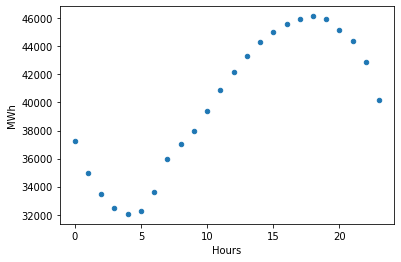

In [ ]:
table1.plot.scatter(x='Hours', y='MWh')

* According the the MVH vs. Hours plot, we can find that there's a pattern between the avearge power consumption and the time. The 4:00 is the lowest power consumption time, the consumption of power increse gradually over time and achieve the highest point at 18:00. Then it decreses gradually untill 4:00.

##Table 2

See if there is a difference of MWh between holiday(1,0) 

In [ ]:
table2=DATA.groupby(['Holiday']).mean()

In [ ]:
table2

,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,feel,summer_winter,...,roll_alti_48_std,roll_mslp_48_avg,roll_mslp_48_std,roll_vsby_48_avg,roll_vsby_48_std,roll_feel_48_avg,roll_feel_48_std,Unnamed: 0,HE,MWh
Holiday,,,,,,,,,,,,,,,,,,,,,
0,66.860239,42.000074,47.617875,185.635349,10.326785,30.041476,1013.400491,9.825740,65.340453,0.493786,...,0.079717,1013.393251,2.943051,9.828763,0.387560,65.349352,8.709218,16918.619296,11.501443,39983.293978
1,60.667284,38.351832,50.143378,189.535489,10.235229,30.054994,1014.481680,9.830453,58.191732,0.812337,...,0.087514,1014.512901,3.261779,9.726711,0.438181,58.481679,9.159921,17078.206243,11.451877,38345.582710


* By creating the table of holidays and the average of weather variables & power consumption, we can tell that the average air temperature, apparent temperature, humidity differs between holidays and non-holidays. Also, there's an average of 1638 MWh difference of power consumption between holidays and non-holidays. So, we propose that the holiday variable has an impact on power consumptions.

##Plot 2

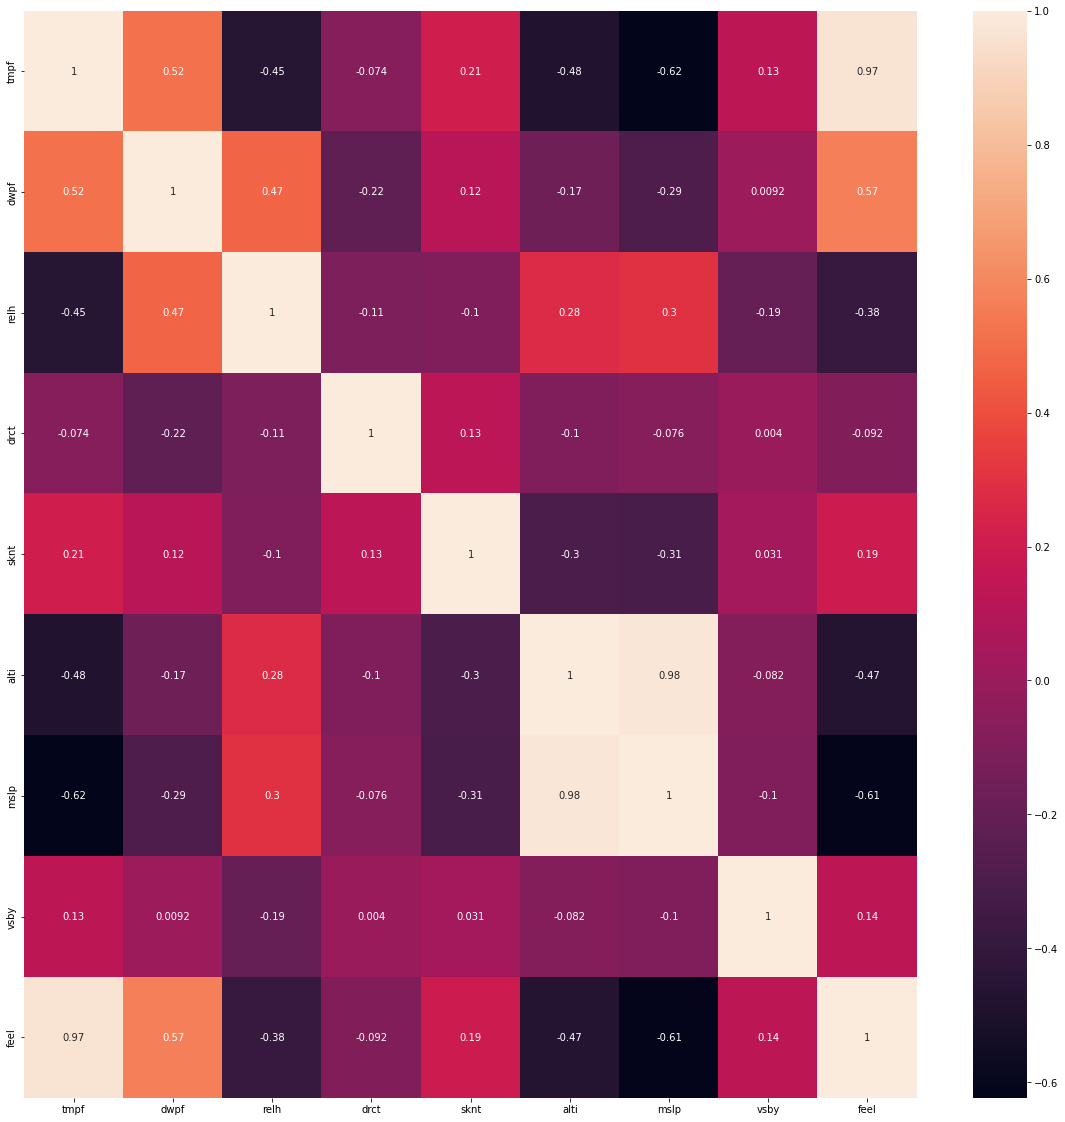

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(20,20))
corrMatrix = DATA[['tmpf','dwpf','relh','drct','sknt','alti','mslp','vsby','feel']].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

* We found difference of MWh when we compare the Holidays, we also want to see the correlation among all the columns. So we created the correlation matrix, from which we can see that 'mslp' and 'feel', 'mslp' and 'tmpf' has a strong negative correlations. 'dwpf' and 'feel', 'dwpf' and 'tmpf' has a positive correlations. 'Feel' and 'tmpf', 'alti' and 'mslp' has a super strong correlations.

# Modeling
Students LOVE fitting models - and I love that! Sometimes, I will get ten versions of a deep learning model in a project, and while I love the enthusiasm I kindly ask that you only show me your BEST model when it comes to submission time. In fact, I encourage you to use early stopping and to save the best model so that you can load it afterwards. You are welcome to submit an appendix code with all of the iterations of models you explored - but this will only be for informational purposes. Keep your final presentation of the modeling VERY CLEAN. Like you would show the VP-Analytics at your company. 

You may only use recurrent neural networks keras models (no sci-kit learn!) with the Sequential() API like we do in class. Do NOT use the window/lag method with a dense neural network or any other ARIMA/FB prophet/stats-related models for this project. I am only assessing your competence on recurrent neural networks on this project.

You must use at least ONE recurrent neural network layer in your model (can be SimpleRNN, LSTM or GRU - bidirectional models are OK too if useful). A winning model will likely stack many layers - and these may also involve convolution and pooling layers. 

Remember, for grading purposes, I only want to see your best fitting model for the submission - keep your code very clean and easy to evaluate. Do not use code samples from outside of class that you don’t understand.


your best fitting model - with loss curves and error metrics for both train and test partition. You may load the weights from your best fitting model.

In [ ]:
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
# RNN-specific modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D,MaxPool1D
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, GRU, LSTM
from tensorflow.keras.callbacks import EarlyStopping



In [ ]:
weather_2011_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87647 entries, 0 to 87646
Columns: 107 entries, valid to MWh
dtypes: datetime64[ns](1), float64(100), int64(6)
memory usage: 72.2 MB


## Dropped date and index columns

In [ ]:
modeling_data_2019 = weather_2011_2019
modeling_data_2019.drop(['valid'], inplace=True, axis=1)
modeling_data_2019.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(87647, 106)

In [ ]:
modeling_data_2020 = weather_2020
modeling_data_2020.drop(['valid'], inplace=True, axis=1)
modeling_data_2020.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(8784, 106)

In [ ]:
modeling_data_2020.head()

,tmpf,dwpf,relh,drct,sknt,alti,mslp,vsby,feel,summer_winter,...,roll_sknt_48_std,roll_alti_48_avg,roll_alti_48_std,roll_mslp_48_avg,roll_mslp_48_std,roll_vsby_48_avg,roll_vsby_48_std,roll_feel_48_avg,roll_feel_48_std,MWh
87647,41.0,30.9,67.03,180.0,11.0,30.06,1015.8,10.0,35.20,1,...,2.748307,30.153958,0.064667,1019.779167,2.421970,10.0,3.636018e-07,34.185625,9.224020,37460.838975
87648,41.0,30.9,67.03,180.0,9.0,30.05,1015.3,10.0,35.75,1,...,2.748307,30.152917,0.065945,1019.729167,2.489635,10.0,3.636018e-07,34.363333,9.168970,36824.115099
87649,39.0,30.9,72.45,170.0,8.0,30.04,1014.5,10.0,33.96,1,...,2.742414,30.151458,0.067666,1019.654167,2.591882,10.0,3.636018e-07,34.517083,9.097274,36531.366488
87650,39.0,30.0,69.85,190.0,7.0,30.02,1014.0,10.0,34.71,1,...,2.737884,30.149583,0.070044,1019.560417,2.713068,10.0,3.636018e-07,34.708333,9.000298,36072.165020
87651,37.9,30.0,72.93,180.0,7.0,30.00,1013.6,10.0,32.64,1,...,2.737884,30.146875,0.073257,1019.450000,2.845153,10.0,3.636018e-07,34.856458,8.904022,35836.161867


In [ ]:
X_cols = weather_2011_2019.columns[:-1]

y_col = ['Mwh']       

In [ ]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(modeling_data_2019[X_cols])
modeling_data_2019[X_cols] = imputer.transform(modeling_data_2019[X_cols])
modeling_data_2020[X_cols] = imputer.transform(modeling_data_2020[X_cols])

features_scaler = preprocessing.MinMaxScaler()
modeling_data_2019[X_cols] = features_scaler.fit_transform(modeling_data_2019[X_cols])
modeling_data_2020[X_cols] = features_scaler.transform(modeling_data_2020[X_cols])

#y_scaler = preprocessing.MinMaxScaler()
#modeling_data_2019[X_cols] = y_scaler.fit_transform(modeling_data_2019[X_cols])
#modeling_data_2020[X_cols] = y_scaler.transform(modeling_data_2020[X_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

## Prep data for modeling (multivariate)

In [ ]:
from numpy import array

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in np.arange(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
	
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# using data till 2019 for training. 2020 data will be used for evaluating the model
n_steps =10
raw_seq = np.array(modeling_data_2019) # data is stored as a numpy array!
# target column MWH will be assigned to y and other columns will be assigned to X
X, y = split_sequences(raw_seq, n_steps)

In [ ]:
print(X.shape)
print(y.shape)

(87638, 10, 105)
(87638,)


In [ ]:
y

array([35765.174232, 34908.264048, 33582.90132 , ..., 40145.543121,
       39330.601248, 38377.355525])

##Data Partitions
Your train partition will be all observations from 2011 through and including 2019. You will validate on the entire year of 2020. You must perform your data splitting TWICE - prepare the samples for training (2011, 2012, 2013 … 2019), and then prepare the data for testing (2020). It may be tough to prepare features for modeling with the 2020 holdout data - make sure you practice early.


### Create X_test and Y_test for 2020 data for model evaluation

In [ ]:
# using data 2020 data 
n_steps = 10
raw_seq = np.array(modeling_data_2020) # data is stored as a numpy array!
# target column MWH will be assigned to y and other columns will be assigned to X
X_test, y_test = split_sequences(raw_seq, n_steps)

In [ ]:
print(X_test.shape)
print(y_test.shape)

(8775, 10, 105)
(8775,)


In [ ]:
y_test

array([37988.181062, 39005.532595, 40011.210673, ..., 47980.656897,
       46754.840878, 45475.412261])

### Split 2019 data for training the model

In [ ]:
# split the data into train and validation partitions
# 80% of the data for train, and 20% for validation
train_pct_index = int(0.8 * len(X))
X_train, X_val = X[:train_pct_index], X[train_pct_index:]
y_train, y_val = y[:train_pct_index], y[train_pct_index:]

In [ ]:
print(np.isnan(X_train).sum())
print(np.isnan(y_train).sum())
print(np.isnan(X_test).sum())
print(np.isnan(y_test).sum())

0
0
0
0


In [ ]:

print(X.shape, X_train.shape, X_val.shape)
print(y.shape, y_train.shape, y_val.shape)

(87638, 10, 105) (70110, 10, 105) (17528, 10, 105)
(87638,) (70110,) (17528,)


## Model

In [ ]:
# define
n_steps = X_train.shape[1]
n_features = X_train.shape[2]

print(n_steps, n_features)

10 105


In [ ]:
# Model
model = Sequential()
model.add(LSTM(128, input_shape=(n_steps,n_features), activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae','mape'])


es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   patience=10, 
                   verbose=1,
                   restore_best_weights=True)

# Fit the model and use Early stopping
model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=5, 
          validation_split=0.2, # val is a random 20% of the data since we set shuffle = True
          verbose=1,
          callbacks=[es],
          shuffle=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               119808    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 119,937
Trainable params: 119,937
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
11218/11218 [==============================] - 113s 10ms/step - loss: 41219796.0000 - mae: 4828.6963 - mape: 12.8957 - val_loss: 25099964.0000 - val_mae: 3916.0339 - val_mape: 9.1797
Epoch 2/500
11218/11218 [==============================] - 110s 10ms/step - loss: 29339870.0000 - mae: 4208.2021 - mape

#Saving the model


In [ ]:
model.save('/content/drive/Shareddrives/OPIM 5509 Deep Learning Project/PROJECT2/RNNmodel_best.h5')

#Results: 
This is the ‘just the facts’ section. Show scatterplots of actual vs. predicted for the train and test partition. Time series plots of actual vs. predicted. Lots of comments and text narrative cells on how the model fit. 


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# make a prediction
test_preds = model.predict(X_test)# the pred
print(test_preds)

[[37094.344]
 [36455.426]
 [35710.332]
 ...
 [38586.492]
 [37494.3  ]
 [36789.234]]


In [ ]:
train_preds = model.predict(X_train)# the pred
print(train_preds)

[[34686.44 ]
 [35376.34 ]
 [33757.992]
 ...
 [34694.098]
 [35115.004]
 [36543.23 ]]


 MAE - Mean Absolute Error.It is a absolute difference between the original and predicted values. We are taking absolute to ignore the negative difference. It is not very sensitive to outliers and lower the value means better model's performance. Below we have little bit high MAE but since R2 value is large hence we can conclude that model performance is good and MAE value for training and test are close enough.

In [ ]:
MAE_train = mean_absolute_error(y_train, train_preds)
print("Train MAE:", MAE_train) 
MAE_test = mean_absolute_error(y_test, test_preds)
print("Test MAE:", MAE_test) 

Train MAE: 2435.6949808949503
Test MAE: 4533.196797134031


In [ ]:
MAPE_train = mean_absolute_percentage_error(y_train, train_preds)
print("Train MAPE:", MAPE_train) 
MAPE_test = mean_absolute_percentage_error(y_test, test_preds)
print("Test MAPE:", MAPE_test) 

Train MAPE: 0.06520990101400843
Test MAPE: 0.10521288182008633


In [ ]:
R2_train = r2_score(y_train, train_preds)
R2_test = r2_score(y_test, test_preds)
print("R2 Train:",R2_train ) 
print("R2 Test:", R2_test) 

R2 Train: 0.8848073626546296
R2 Test: 0.6598322703835804


## Scatterplots of actual vs. predicted for train and test results

Below Scatter plots will show if there is any linearity between predicted values versus the actual values. Ideally, the data points should lie around the diagonal line on the plot. In Test Scatter plot, we see that data points are around the line with some outliers.

## Scatterplot for Training Result

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Scatter Plot for Train Results')

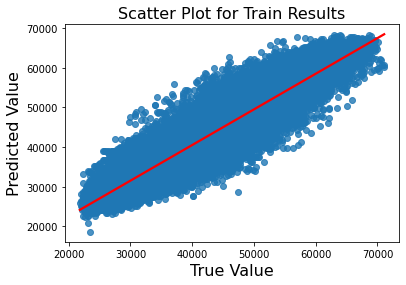

In [ ]:
sns.regplot(x=y_train, y=train_preds, ci=None,line_kws={"color": "red"})
plt.xlabel('True Value', fontsize=16)
plt.ylabel('Predicted Value',fontsize=16)
plt.title('Scatter Plot for Train Results',fontsize=16)


## Scatterplot for Test Result

Text(0.5, 1.0, 'Scatter Plot for Test Results')

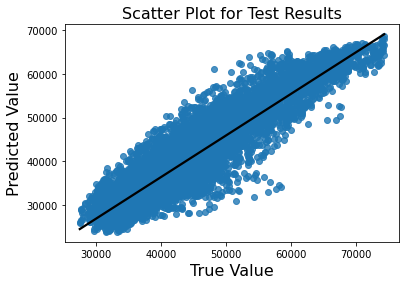

In [ ]:
sns.regplot(x=y_test, y=test_preds, ci=None,line_kws={"color": "black"})
plt.xlabel('True Value', fontsize=16)
plt.ylabel('Predicted Value', fontsize=16)
plt.title('Scatter Plot for Test Results',fontsize=16)

#Analysis: 
How did your model do? How does your model do compared to other hour-ahead energy forecasting models? Dig deep into the results of the train vs. test partition. You may want to look at the distribution of ‘mean_absolute_error’ by month and by day or by hour for 2020 (which hours are easiest to predict, which are the most difficult?). You may opt to resample your results for easy comparison (for example, is there one month of week where your model tends to underestimate or overestimate?) Be creative here.


Our model does a good job with MAE on the testing dataset as $4533$, and MAPE as $0.105$. The MAE and MAPE on the training dataset is $2435$ and $0.065$ respectively. 

So, based on these two evaluation metrics, we perceive this model as optimal, given the results of other dataset as $MAE = 24806.585847399958$, $MAPE = 0.5694661965051013$ on the testing datset.

According to the prediction result, we can say that on average, the forecast's distance from the true value is about 4533, and the forecast's distance from the true value is 10.5% of the true value. 



In [ ]:
forecast_2020 = pd.DataFrame([y_test,test_preds]).T

In [ ]:
forecast_2020['pred'] = forecast_2020[1].apply(lambda x: x[0])

In [ ]:
forecast_2020= forecast_2020.rename(columns={0:'actuals'})

In [ ]:
forecast_2020_2 = pd.merge(forecast_2020,DATA[['valid','MWh']],left_on='actuals',right_on='MWh')

In [ ]:
forecast_2020_2 = forecast_2020_2.set_index(['valid'])

In [ ]:
forecast_2020_2['abs_err'] = abs(forecast_2020_2['pred']-forecast_2020_2['actuals'])
forecast_2020_2['abs_pct_err'] = abs((forecast_2020_2['pred']-forecast_2020_2['actuals'])/forecast_2020_2['actuals'])

## MAE & MAPE by hour

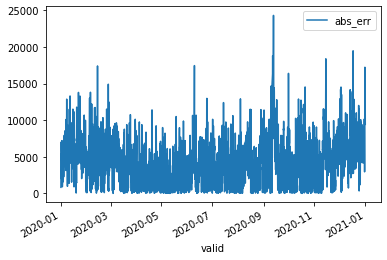

In [ ]:
forecast_2020_2[['abs_err']].plot()

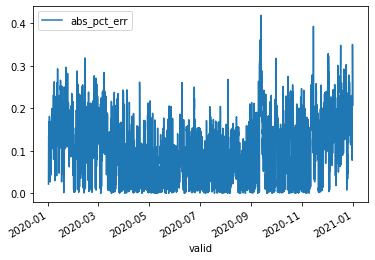

In [ ]:
forecast_2020_2[['abs_pct_err']].plot()

## MAE & MAPE by day

In [ ]:
forecast_2020_d = forecast_2020_2.resample('D').sum()

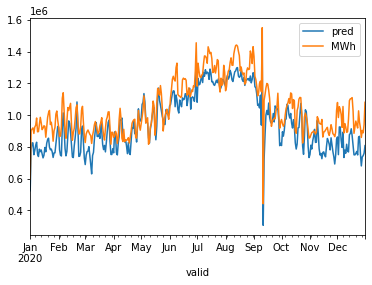

In [ ]:
forecast_2020_d.plot()

In [ ]:
forecast_2020_d['abs_err'] = abs(forecast_2020_d['pred']-forecast_2020_d['MWh'])
forecast_2020_d['abs_pct_err'] = abs((forecast_2020_d['pred']-forecast_2020_d['MWh'])/forecast_2020_d['MWh'])

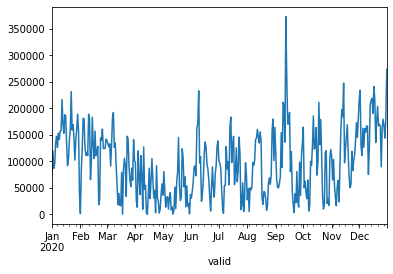

In [ ]:
forecast_2020_d['abs_err'].plot()

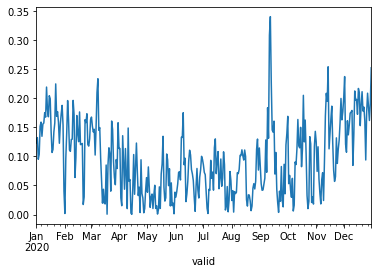

In [ ]:
forecast_2020_d['abs_pct_err'].plot()

There seems to be difficulty in the prediction on one day in september as we could see huge spike in that month. Volatility of prediction error reduces from april to aug but september to mar seems to be having higher volatility

#Conclusion: 
share five or ten detailed bullets on what you learned, how your model performed, and why it is (or isn’t) a useful model. 


1: The research papers helped us understand more about the relationship between various weather variables and energy demand. This formed the framework for our project on what basic features to use. Spending time on literature review is a great first step to approach any new machine learning problem both from a business and technical perspective

2: Working on this project, we understood that the Data resampling and cleaning being the most important part of the project and its very important to align the variables with different frequencies to same frequency,i.e., 1 hour in out project. Also, Neural networks seems to have zero tolerance for missing data which is different compared to the tree-based models and hence, clean data seems to be the heart of any good machine learning project

3: Basic exploratory analysis helped us understand the nature of different variables, is there a linear or nonlinear patterns in the data giving us some insights on different techniques that we can use to model/capture those patterns.Also, making sure that there is no look-ahead bias help our test performance better and metrics similar to train dataset 


4: Trying out different Feature engineering and model architecture combinations in a feedback loop helped us understand how important is both feature engineering and model architecture in an RNN project. Interestingly, we got better results with more simple model architecture compared to complex one. Also, adding new features such as rolling features seems to decrease the errors pretty well but there should be trade off on what kind of rolling features are important. Here, rolling mean and rolling standard deviation of weather variables seem to improve the model in our project

5: With current state of model at train R2 score of 86% and test R2 score of 74%, this seems to be a good model but also there is a lot of scope for improvement. Also, our MAPE is ~8% which seems decent

6: This RNN model predicting the energy demand based on different weather variables is more intelligent way of forecasting the energy consumption and would definitely alleviate the problems of underestimating/overestimating the energy demand and especially help there no large blackout periods like that happened in Texas recently

#Appendix

* In Conv1D layer the kernel slides along one dimension.
* Next is max pooling layer which has no trainable paramters. The pooling layer reduces the learned features, consolidating them to only the most essential elements.
* Stacked LSTM layer which will have 3D output and will return hidden state from each and every time steps.
* Next is GRU layer which consist of the reset gate and the update gate. Return sequence in the layer will return vector at every timestamp. It solves the exploding and vanishing gradient problem.
* There are 2 GRU layers in below model.
* Next GRU layer will return from the last state and then we have 4 dense layers.

In [ ]:
# Model
model = Sequential()
model.add(Conv1D(128, kernel_size=2,input_shape=(n_steps,n_features)))
model.add(MaxPool1D(2))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(GRU(100, return_sequences=True,activation='relu',recurrent_dropout=0.1))
model.add(GRU(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   patience=10, 
                   verbose=1,
                   restore_best_weights=True)

# Fit the model and use Early stopping
model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=5, 
          validation_split=0.2, # val is a random 20% of the data since we set shuffle = True
          verbose=1,
          callbacks=[es],
          shuffle=True)

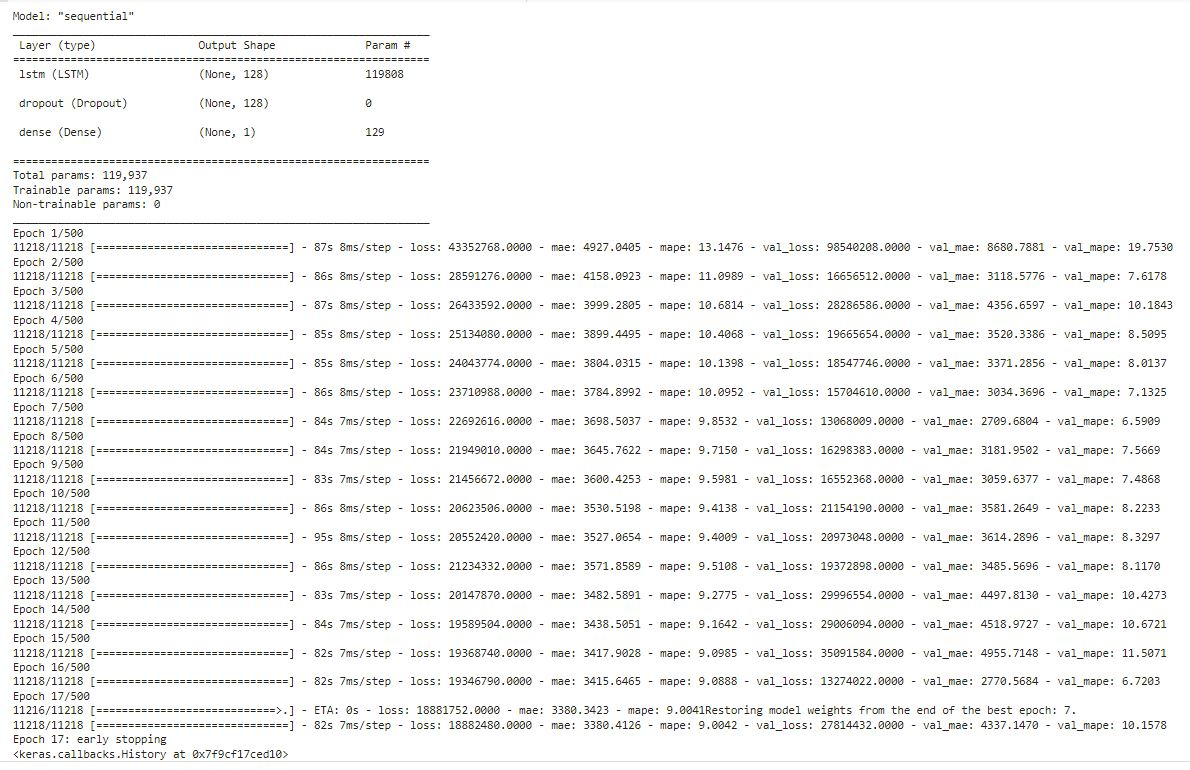